# Practical 14: making your own network

When completing a bioinformatics project, you will usually have to work through each step from initial questions,
such as "What proteins interact with my protein of interest? How are they interacting? Is my protein important?".

You will then need to gather data, write the code necessary to process that data, and finally display your results.
This is what we are going to do today.

## Preliminary work: getting the data
- Go to the STRING database, for protein-protein interaction: https://string-db.org
- open one of the example network (or create one of your choice!)
- look at the network
- export the network to a file (use tabular text output)

At this point, you should have a file "my_network.tsv" (the name may be different!), exported from stringdb, that represent your network.

You can now start analysing it!

## Plotting the network
- Create a pandas dataframe from the tsv file you just downloaded (N.B.: you will have to upload it to jupyterhub if that is what you are using)
- Create a Graph object using networkx
- Can you plot this graph?
- Which protein has the highest degree?
- Can you color the edges based on the combined score? the phylogenetic coocurrence ?

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
edge_attributes = ["gene_fusion", 
                   "phylogenetic_cooccurrence", 
                   "homology", 
                   "coexpression",
                   "neighbourhood_on_chromosome"
                   "experimentally_determined_interaction",
                   "database_annotated",
                   "automated_textmining",
                   "combined_score"]
for i in edge_attributes:
    print(i)
    
edge_color_value = str(input("Enter edge attribute to color edges by:"))

try: 
    G = nx.from_pandas_edgelist(df, "#node1", "node2", edge_color_value) # adds the specified attribute to the edges (to define color later on)
except:
    raise KeyError("Not a defined attribute: please enter an attribute from the list above")

df = pd.read_table("string_interactions_short.tsv")

gene_fusion
phylogenetic_cooccurrence
homology
coexpression
neighbourhood_on_chromosomeexperimentally_determined_interaction
database_annotated
automated_textmining
combined_score


Enter edge attribute to color edges by: combined_score


In [115]:
degree = dict(G.degree())
max_finder = [i for i in degree if degree[i] == max(degree.values())] # finds the maximum degree value, and makes a list of all the proteins with that degree value
print("Protein(s) with highest degree:")
for i in max_finder: 
    print(i)

Protein(s) with highest degree:
BARD1
BRCA1


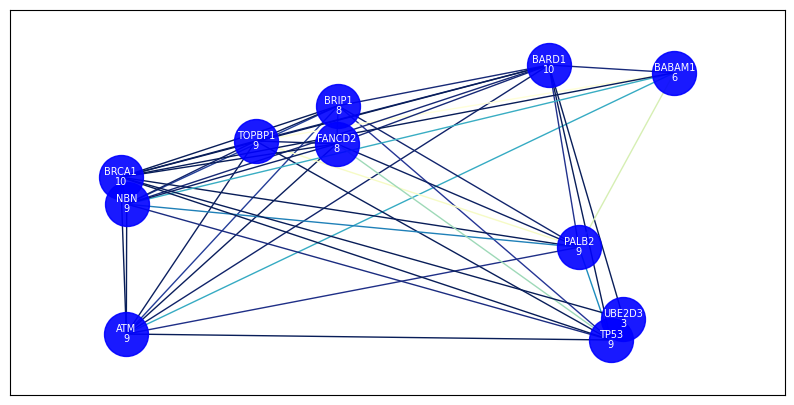

In [116]:
pos = nx.random_layout(G)
value = list()
for node, links in G.edges:
    value = value + [G[node][links][edge_color_value]]

fig, ax = plt.subplots(figsize=(10, 5))
nx.draw_networkx_edges(G, pos, 
                       edge_color=value, 
                       edge_cmap=plt.cm.YlGnBu) # assigns color value to edge attribute - the higher the attribute, the darker the edge drawn
nx.draw_networkx_nodes(G, pos, 
                       node_color="blue", 
                       node_size=1000,
                       alpha=0.9)
nx.draw_networkx_labels(G, pos, 
                        font_color="white", 
                        font_size=7,
                        verticalalignment="bottom") # provides the gene name label (note: "bottom" alignment actually places label at the top of the node)
nx.draw_networkx_labels(G, pos, 
                        labels=degree, 
                        font_color="white", 
                        font_size=7, 
                        verticalalignment="top") # provides the connectivity degree label for each node
ax.margins(0.20)
plt.show()